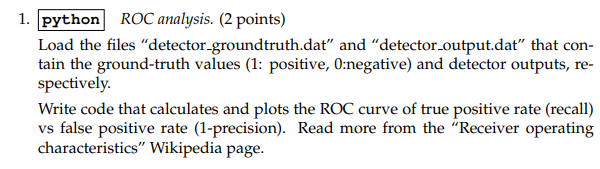

# Task 1 ROC analysis

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import tensorflow as tf


labels = np.loadtxt('detector_groundtruth.dat', dtype=int)
predictions = np.loadtxt('detector_output.dat' , dtype=float)

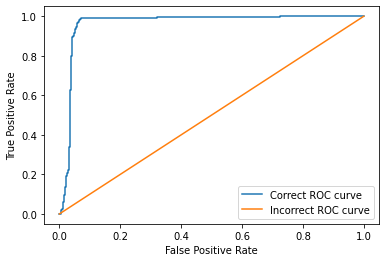

In [20]:
fpr, tpr, tresholds = metrics.roc_curve(labels,  predictions)

predictions_thresholded = predictions > 0.5
tpr2, fpr2, thresholds2 = metrics.roc_curve(labels, predictions_thresholded)

#create ROC curve
plt.plot(tpr,fpr)
plt.plot(fpr2,tpr2)
plt.legend(labels=['Correct ROC curve', 'Incorrect ROC curve'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Task 2) Noisy MNIST Fashion classification


(60000, 28, 28)
(10000, 28, 28)


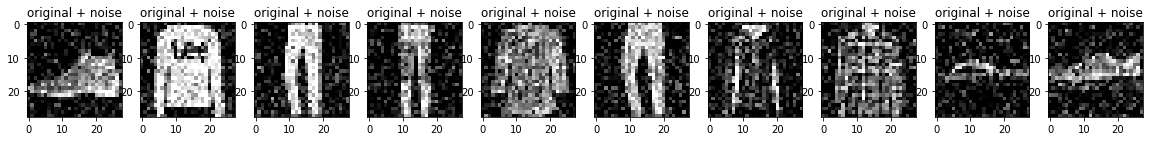

In [28]:
# We are using MNIST Fashion data

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0

test_images = test_images / 255.0

print (train_images.shape)
print (test_images.shape)

# From lectures: Let's add that magical one dimension of keep TF happy
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

noise_factor = 0.2
train_images_noisy = train_images + noise_factor * tf.random.normal(shape=train_images.shape)
test_images_noisy = test_images + noise_factor * tf.random.normal(shape=test_images.shape)

# Make sure values still in (0,1)
train_imagse_noisy = tf.clip_by_value(train_images_noisy, clip_value_min=0., clip_value_max=1.)
test_images_noisy = tf.clip_by_value(test_images_noisy, clip_value_min=0., clip_value_max=1.)

# Print examples..
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(test_images_noisy[i]))
    plt.gray()
plt.show()


In [52]:
print(train_images.shape, np.eye(10)[train_labels].shape)

(60000, 28, 28, 1) (60000, 10)


In [43]:
#Task 2, part 3 defining CNN classification model.

# Defining the model
model = tf.keras.models.Sequential()

# Add hidden layers
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',  padding = 'same', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding = 'same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(52, activation='relu')) # Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax')) # Output layer

model.build(input_shape=(None, 28, 28,1)) # Build model 
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 128)        

Epoch 1/20


c:\Conda\lib\site-packages\keras\src\backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 30s 16ms/step - loss: 0.4546 - accuracy: 0.8357
Epoch 2/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2866 - accuracy: 0.8958
Epoch 3/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2387 - accuracy: 0.9133
Epoch 4/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2088 - accuracy: 0.9230
Epoch 5/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1845 - accuracy: 0.9331
Epoch 6/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1640 - accuracy: 0.9398
Epoch 7/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1432 - accuracy: 0.9471
Epoch 8/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1267 - accuracy: 0.9534
Epoch 9/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1123 - accuracy: 0.9584
Epoch 10/20
1875/1875 [==============================] - 29s 15ms/step - lo

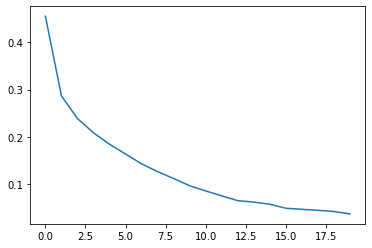

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=["accuracy"])


history = model.fit(train_images, np.eye(10)[train_labels], epochs=20)


print(f'Accuracy: {history.history["accuracy"][-1]}')

plt.plot(history.history['loss'])